<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist                                                # Importing Necessary Libraries and dataset(in keras)

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()                        # mnist data divided into Training and Test Data
                                                                                # Where X_train are 60K 28x28 gray scale training images of numbers from [0-9] 
                                                                                # y_train are label of numbers from [0-9]

(60000, 28, 28)


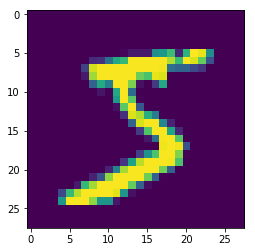

In [158]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])                                                           # Displaying what one of the images look like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)                           # (60000, 28, 28) ->  (60000, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')                                             # Convert to float type
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255                                                                   # Floating Value ranges from [0,1]

In [161]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)                                  
Y_test = np_utils.to_categorical(y_test, 10)

In [163]:
Y_train[:10]                                                                    ## y_train to Y_train  - example,5 value is converted to an array where 5th element of array is 1(lit) and rest all is 0 
                                                                                
                                                                                # OR 
                                                                                
                                                                                # 1 Hot Encoded  


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### This assignment's code is divided into 4 parts. 

1.    Architecture( remains constant).
2.    Kernel Optimization to fit under 15K constraint.
3.    Go Crazy (Batch Normalization, Drop Out, Learning Rate, Batch Size).
4.    Accuracy above 99.4% (if possible less than 15 epochs)

#### Guidelines
1.    Make sure you are tracking your code's performance, and writing down your observations as you achieve better or worse results
2.    Your second code can only have max 2 improvements over first one, third can have only max 2 over second and so on. 
3.    All of your iterations are in different CODE BLOCKS and named properly like First CODE, Second CODE, etc
4.    All of your iterations have a Header note, describing what all you are planning to do in this code
5.    All of your code is very well documented
6.    There is a readme file (or embedded documentation) describing your codes and steps you've taken




# CODE 1 - Architecture

In [164]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))    #26
model.add(Convolution2D(32, 3, 3, activation='relu'))                           #24
model.add(Convolution2D(10, 1, 1, activation='relu'))                           #24
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #12

model.add(Convolution2D(16, 3, 3, activation='relu'))                           #10
model.add(Convolution2D(32, 3, 3, activation='relu'))                           #8
model.add(Convolution2D(32, 3, 3, activation='relu'))                           #6
model.add(Convolution2D(64, 3, 3, activation='relu'))                           #4
model.add(Convolution2D(10, 4))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_193 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 6, 6, 32)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/

In [165]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 311us/step - loss: 1.3781 - acc: 0.5742 - val_loss: 0.2832 - val_acc: 0.9109
Epoch 2/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.2083 - acc: 0.9355 - val_loss: 0.1468 - val_acc: 0.9555
Epoch 3/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.1287 - acc: 0.9595 - val_loss: 0.1243 - val_acc: 0.9620
Epoch 4/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0991 - acc: 0.9689 - val_loss: 0.1005 - val_acc: 0.9663
Epoch 5/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.0815 - acc: 0.9743 - val_loss: 0.0750 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0698 - acc: 0.9775 - val_loss: 0.0857 - val_acc: 0.9730
Epoch 7/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0612 - acc: 0.9808 - val_loss: 0.

# CODE 2 - Kernel Optimization to fit under 15K 

In [166]:
# Set up data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)                           
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')                                            
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)                                  
Y_test = np_utils.to_categorical(y_test, 10)

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(28,28,1)))    #26
model.add(Convolution2D(16, (3, 3), activation='relu'))                           #24
model.add(Convolution2D(10, (1, 1), activation='relu'))                           #24

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #12

model.add(Convolution2D(8, (3, 3), activation='relu'))                           #10
model.add(Convolution2D(16, (3, 3), activation='relu'))                           #8
model.add(Convolution2D(16, (3, 3), activation='relu'))                           #6
model.add(Convolution2D(16, (3, 3), activation='relu') )                          #4
model.add(Convolution2D(10, 4))        
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_201 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 10, 10, 8)         728       
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 8, 8, 16)          1168      
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 6, 6, 16)        

In [167]:
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 278us/step - loss: 1.1571 - acc: 0.6180 - val_loss: 0.3037 - val_acc: 0.9096
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2759 - acc: 0.9163 - val_loss: 0.1969 - val_acc: 0.9400
Epoch 3/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1911 - acc: 0.9422 - val_loss: 0.2703 - val_acc: 0.9099
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1521 - acc: 0.9533 - val_loss: 0.1242 - val_acc: 0.9597
Epoch 5/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1290 - acc: 0.9610 - val_loss: 0.1466 - val_acc: 0.9576
Epoch 6/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1130 - acc: 0.9650 - val_loss: 0.0952 - val_acc: 0.9697
Epoch 7/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.1006 - acc: 0.9690 - val_loss: 0.

# Go Crazy (Batch Normalization, Drop Out, Learning Rate, Batch Size)

In [168]:
# Set up data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)                           
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')                                            
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)                                  
Y_test = np_utils.to_categorical(y_test, 10)

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1)))    #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu'))                           #24
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, 1, activation='relu'))                           #24
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #12

model.add(Convolution2D(16, 3, 3, activation='relu'))                           #10
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))                           #8
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))                           #6
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))                           #4
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()
# model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
# model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activa

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_209 (Conv2D)          (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_55 (Batc (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_55 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 24, 24, 20)        2180      
_________________________________________________________________
batch_normalization_56 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_56 (Dropout)         (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 24, 24, 10)      

In [169]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 21s 348us/step - loss: 0.2010 - acc: 0.9376 - val_loss: 0.0608 - val_acc: 0.9802
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0618 - acc: 0.9811 - val_loss: 0.0547 - val_acc: 0.9823
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0382 - val_acc: 0.9887
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 174us/step - loss: 0.0416 - acc: 0.9874 - val_loss: 0.0278 - val_acc: 0.9908
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)                               # Evaluate the Model over test data

In [171]:
print(score)                                                                    # Accuracy over test data.

[0.02502111189525458, 0.9919]


In [0]:
y_pred = model.predict(X_test)                                                  # predicting the values with validation accuracy

In [173]:
print(y_pred[:9])                                                               
print(y_test[:9])

[[1.77356352e-10 1.38370897e-08 5.53740431e-09 2.52708588e-07
  5.84770543e-09 1.14957115e-11 1.46319198e-12 9.99999762e-01
  7.75582463e-12 1.21467041e-08]
 [2.83987323e-08 2.97360820e-08 9.99999404e-01 2.66138356e-09
  1.80243607e-08 2.70132770e-11 5.75207650e-07 1.39992762e-09
  4.69645229e-08 2.78989193e-10]
 [2.79346857e-09 9.99998331e-01 5.19342291e-10 1.59502175e-10
  8.67906635e-07 1.29383626e-09 8.95025654e-09 6.47722572e-07
  2.50251042e-10 1.10480094e-07]
 [9.99956131e-01 6.80024023e-11 9.10567355e-09 4.82360374e-10
  3.38586492e-09 1.47965524e-08 4.37757590e-05 6.48490683e-09
  2.72586131e-08 4.26650857e-08]
 [4.68651116e-12 3.98746647e-10 1.35070802e-10 2.23131930e-11
  9.99993920e-01 2.52217691e-12 9.01732716e-11 1.50656021e-07
  2.68044587e-10 6.01666579e-06]
 [1.70645509e-09 9.99998927e-01 3.79426185e-10 7.61960113e-12
  8.55734612e-08 1.03927193e-10 8.99346764e-10 9.35806497e-07
  2.75858537e-11 5.19399670e-08]
 [3.40549915e-11 1.16048363e-06 1.04308491e-08 1.13264842e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [175]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored